# Euler-Bernoulli Beam Equation

## Problem setup

We will solve a Euler beam problem:

$$
EI\frac{d^{4}u}{dx^{4}}=p, \qquad x \in [0, 1],
$$

with two boundary conditions on the right boundary,

$$
u''(1)=0,   u'''(1)=0
$$

and one Dirichlet boundary condition on the left boundary,

$$
u(0)=0
$$

along with one Neumann boundary condition on the left boundary,

$$
u'(0)=0
$$

The exact solution is $u(x) = -\frac{1}{24}x^4+\frac{1}{6}x^3-\frac{1}{4}x^2.$



## Dimensional Analysis

### **Boundary Conditions:**
1. **Right Boundary (at $ x = 1 $):**

   $$
   u''(1) = 0, \quad u'''(1) = 0
   $$

2. **Left Boundary (at $ x = 0 $):**

   $$
   u(0) = 0, \quad u'(0) = 0
   $$

### **Assigning Physical Units:**

Let's identify and assign physical units to each variable and parameter in the equation.

| **Variable/Parameter** | **Symbol** | **Physical Quantity**             | **Unit (SI)**       | **Dimension**            |
|------------------------|------------|-----------------------------------|---------------------|--------------------------|
| **Displacement**       | $ u $    | Beam deflection                   | meters (m)          | Length $[L]$           |
| **Position**           | $ x $    | Spatial coordinate along the beam | meters (m)          | Length $[L]$           |
| **Young's Modulus**    | $ E $    | Material property (stiffness)     | pascals (Pa)        | Pressure $[M][L]^{-1}[T]^{-2}$ |
| **Second Moment of Area** | $ I $    | Geometric property of the beam    | meters$^4$ (m$^4$) | Length $^4$ $[L]^4$  |
| **Flexural Rigidity**  | $ EI $   | Product of $ E $ and $ I $    | newton-meter squared (N·m$^2$) | $[EI] = [E][I] = [M][L]^3[T]^{-2}$ |
| **Load per Unit Length** | $ p $    | Distributed load on the beam       | newtons per meter (N/m) | Force per Length $[M][L][T]^{-2}[L]^{-1} = [M][T]^{-2}$ |

### **Dimensional Consistency Check:**

To ensure the equation is dimensionally consistent, both sides must have the same dimensions.

1. **Left Side ($ EI \frac{d^4 u}{dx^4} $):**
   - $ EI $ has units of N·m$^2$ and dimensions $[M][L]^3[T]^{-2}$.
   - $ \frac{d^4 u}{dx^4} $ involves four derivatives with respect to $ x $, each introducing a factor of $[L]^{-1}$.
   - Thus, $ \frac{d^4 u}{dx^4} $ has dimensions $[L]^{-4} \times [L] = [L]^{-3}$.
   - Multiplying by $ EI $: $[M][L]^3[T]^{-2} \times [L]^{-3} = [M][T]^{-2}$.

2. **Right Side ($ p $):**
   - $ p $ has units of N/m and dimensions $[M][T]^{-2}$.

Both sides have the same dimensions $[M][T]^{-2}$, confirming dimensional consistency.

### **Summary of Physical Units:**

- **$ u $** (Displacement): meters (m)
- **$ x $** (Position): meters (m)
- **$ E $** (Young's Modulus): pascals (Pa) = N/m$^2$
- **$ I $** (Second Moment of Area): meters$^4$ (m$^4$)
- **$ EI $** (Flexural Rigidity): newton-meter squared (N·m$^2$)
- **$ p $** (Load per Unit Length): newtons per meter (N/m)

### **Boundary Conditions Units:**

1. **$ u''(1) = 0 $:**
   - $ u'' $ involves two derivatives: $[L] \times [L]^{-2} = [L]^{-1}$
   - Units: 1/m

2. **$ u'''(1) = 0 $:**
   - $ u''' $ involves three derivatives: $[L] \times [L]^{-3} = [L]^{-2}$
   - Units: 1/m$^2$

3. **$ u(0) = 0 $:**
   - Units: meters (m)

4. **$ u'(0) = 0 $:**
   - $ u' $ involves one derivative: $[L] \times [L]^{-1} = \text{dimensionless}$ (often interpreted as radians in small-angle approximations)

### **Conclusion:**

All variables and parameters in the Euler-Bernoulli Beam Equation have been assigned consistent physical units, ensuring dimensional integrity of the equation and its boundary conditions.




## Code Implementation

First, we import the necessary libraries and define the physical units for the problem.

In [1]:
import brainstate as bst
import brainunit as u

import deepxde.experimental as deepxde

Define the physical units for the problem.

In [2]:
unit_of_u = u.meter
unit_of_x = u.meter
unit_of_E = u.pascal
unit_of_I = u.meter ** 4
unit_of_p = u.kilogram / u.second ** 2


Define the parameters for the problem.

In [3]:
E = 1 * unit_of_E
I = 1 * unit_of_I
p = -1. * unit_of_p


Define the PDE  for the Euler beam problem.

In [4]:
def pde(x, y):
    dy_xxxx = net.gradient(x, order=4)['y']['x']['x']['x']['x']
    return E * I * dy_xxxx - p

Define the geometric domain for the problem.

In [5]:

geom = deepxde.geometry.Interval(0, 1).to_dict_point(x=unit_of_x)


Define the boundary conditions for the problem.

In [6]:

def boundary_l(x, on_boundary):
    return u.math.logical_and(on_boundary, deepxde.utils.isclose(x['x'] / unit_of_x, 0))


def boundary_r(x, on_boundary):
    return u.math.logical_and(on_boundary, deepxde.utils.isclose(x['x'] / unit_of_x, 1))


bc1 = deepxde.icbc.DirichletBC(lambda x: {'y': 0 * unit_of_u}, boundary_l)
bc2 = deepxde.icbc.NeumannBC(lambda x: {'y': 0 * unit_of_u}, boundary_l)
bc3 = deepxde.icbc.OperatorBC(lambda x, y: net.hessian(x)['y']['x']['x'] / u.meter, boundary_r)
bc4 = deepxde.icbc.OperatorBC(lambda x, y: net.gradient(x, order=3)['y']['x']['x']['x'] / u.meter ** 2, boundary_r)


Define the neural network model for the problem.

In [7]:
net = deepxde.nn.Model(
    deepxde.nn.DictToArray(x=unit_of_x),
    deepxde.nn.FNN([1] + [20] * 3 + [1], "tanh"),
    deepxde.nn.ArrayToDict(y=unit_of_u),
)

Define the exact solution for the problem.

In [8]:
def func(x):
    x = x['x'] / unit_of_x
    y = -(x ** 4) / 24 + x ** 3 / 6 - x ** 2 / 4
    return {'y': y * unit_of_u}


data = deepxde.problem.PDE(
    geom,
    pde,
    [bc1, bc2, bc3, bc4],
    net,
    num_domain=100,
    num_boundary=20,
    solution=func,
    num_test=100,
)

Train the model and evaluate the results.

Compiling trainer...
'compile' took 0.058168 s

Training trainer...

Step      Train loss                                          Test loss                                           Test metric                                        
0         [172697.52 * kilogram ** 2 * second ** -4,          [198196.31 * kilogram ** 2 * second ** -4,          [{'y': Array(0.49183828, dtype=float32)}]          
           {'ibc0': {'y': 0. * meter}},                        {'ibc0': {'y': 0. * meter}},                                                                          
           {'ibc1': {'y': 0.34124637 * meter}},                {'ibc1': {'y': 0.34124637 * meter}},                                                                  
           {'ibc2': 0.02639124 * metre ** -2},                 {'ibc2': 0.02639124 * metre ** -2},                                                                   
           {'ibc3': 1.2099838 * metre ** -4}]                  {'ibc3': 1.2099838 * metre ** -4}]    

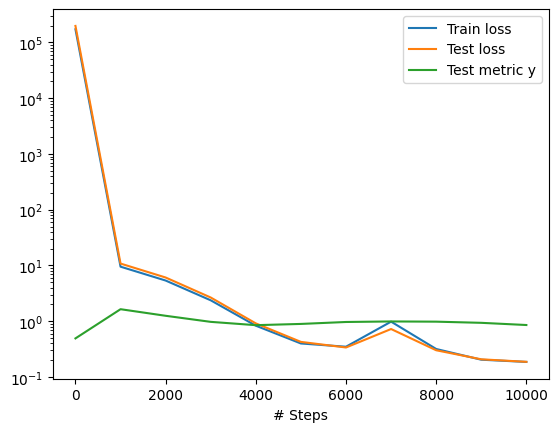

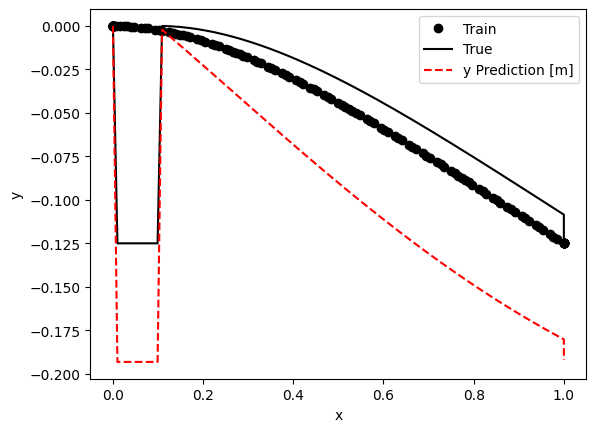

In [9]:
trainer = deepxde.Trainer(data)
trainer.compile(bst.optim.Adam(0.001), metrics=["l2 relative error"]).train(iterations=10000)
trainer.saveplot(issave=True, isplot=True)
